## Getting data

### inspect pic

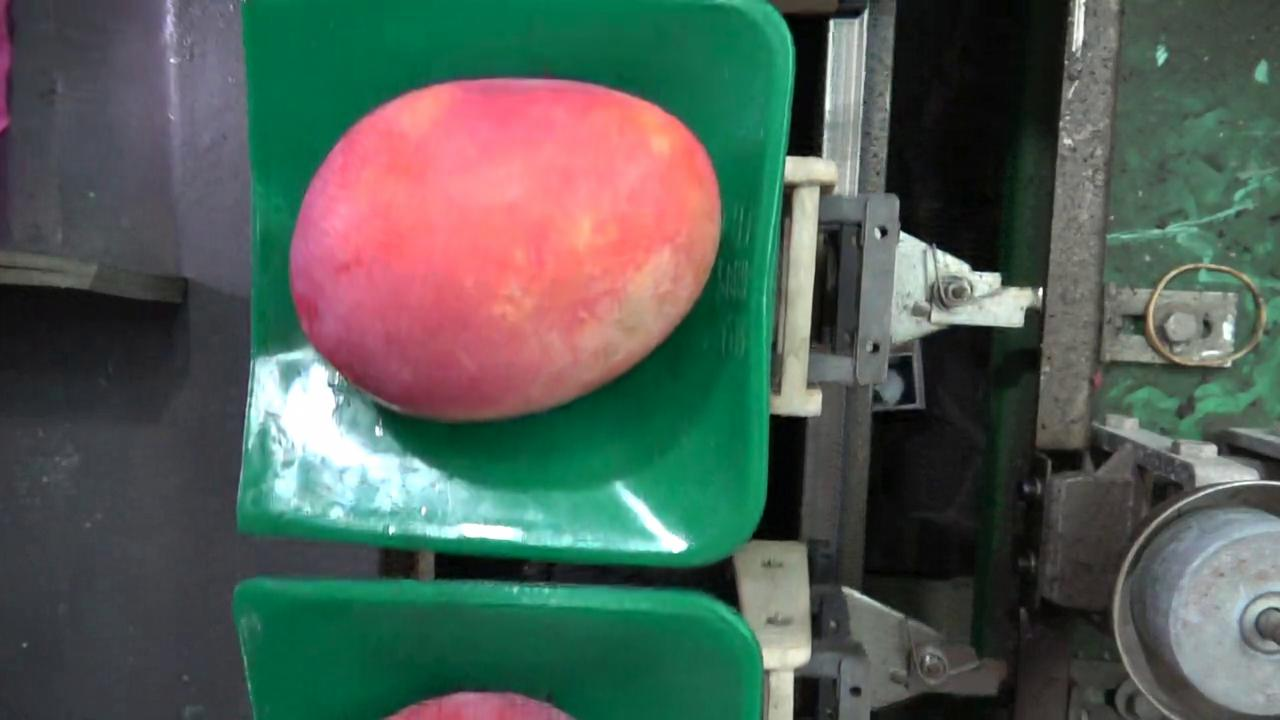

In [107]:
from PIL import Image
image = Image.open(r'D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\Train\03182.jpg')
image

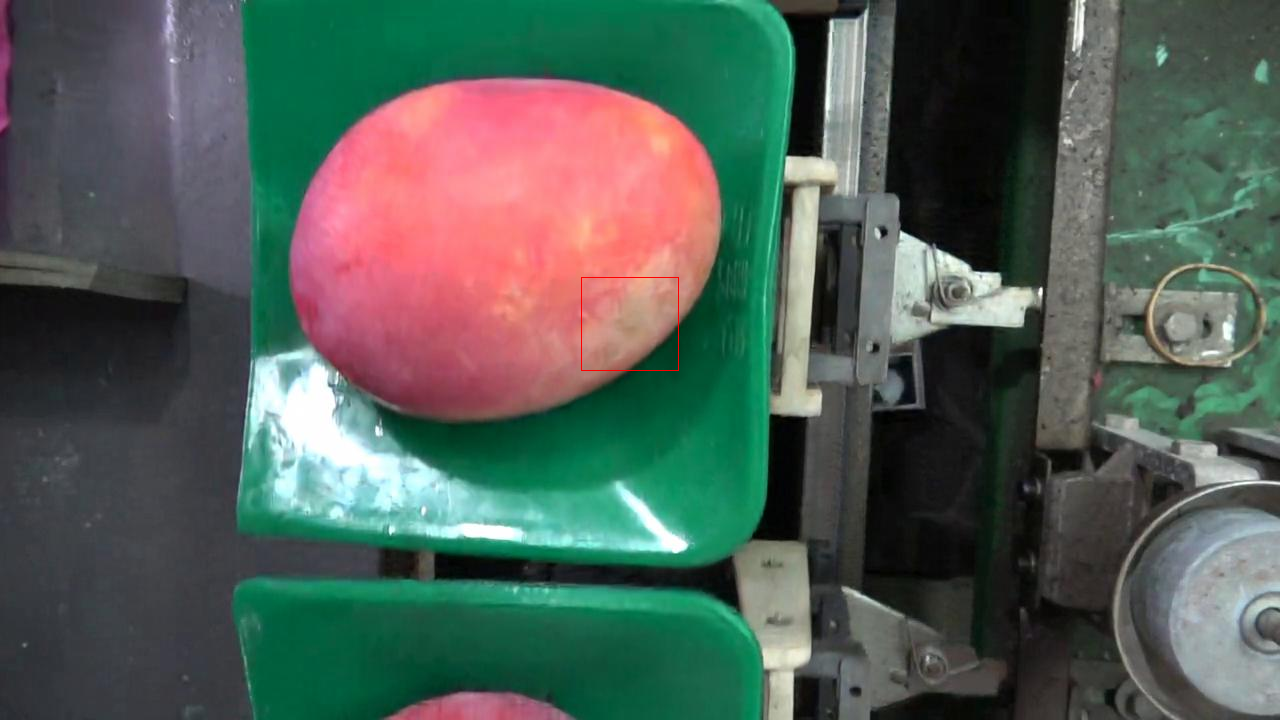

In [108]:
from PIL import ImageDraw
xmin = 581
ymin = 277
xmax = xmin+97
ymax = ymin+93
draw = ImageDraw.Draw(image)
draw.rectangle([(xmin, ymin), (xmax, ymax)], outline ="red")
image

### inspect data

In [109]:
import pandas as pd
df = pd.read_csv(r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\train.csv", header=None)
df

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0    1    2    3    4        5      6      7      8      9    \
0      38414.jpg   46  146  576  574  不良-機械傷害    NaN    NaN    NaN    NaN   
1      03182.jpg  581  277   97   93  不良-機械傷害    NaN    NaN    NaN    NaN   
2      29863.jpg  514  538  117  144  不良-機械傷害    NaN    NaN    NaN    NaN   
3      17937.jpg  658  263   59   74  不良-機械傷害  374.0  243.0  609.0  334.0   
4      40878.jpg  432  160  116  132  不良-機械傷害  620.0  289.0  104.0  100.0   
...          ...  ...  ...  ...  ...      ...    ...    ...    ...    ...   
25763  35952.jpg  392  460   44   38   不良-炭疽病  889.0  138.0   55.0   40.0   
25764  06823.jpg  815  598   63   51   不良-炭疽病  366.0  313.0  157.0   70.0   
25765  21422.jpg  510  162   91   74   不良-炭疽病    NaN    NaN    NaN    NaN   
25766  06815.jpg  463   75  709  468   不良-炭疽病  793.0  686.0   35.0   23.0   
25767  11562.jpg  359  434   45   35   不良-炭疽病  579.0  149.0   59.0   26.0   

       ... 126  127  128  129  130 131  132  133  134  135  
0      ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
1      ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
2      ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
3      ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
4      ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
...    ...  ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  
25763  ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
25764  ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
25765  ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
25766  ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  
25767  ... NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  

[25768 rows x 136 columns]

### processing data

In [110]:
import numpy as np
label=[]
image=[]
xmin=[]
ymin=[]
xmax=[]
ymax=[]

with open(r'D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\train.csv', 'r', encoding='utf-8-sig') as fh:
  for index,row in enumerate(fh):
    row=row.strip()
    row=row.split(',')
    while True:
      if '' in row:
        row.remove('')
      else:
        break

    while len(row) > 1:
      xmin.append(float(row[1]))
      ymin.append(float(row[2]))
      xmax.append(float(row[3])+float(row[1]))
      ymax.append(float(row[4])+float(row[2]))
      label.append(row[5])
      for idx in range(5):
        row.remove(row[1]) 
      image.append(row[0])

print('label:' ,len(label))
print('image:' ,len(image))
print('xmin:' ,len(xmin))
print('ymin:' ,len(ymin))
print('xmax:' ,len(xmax))
print('ymax:' ,len(ymax))


label: 43370
image: 43370
xmin: 43370
ymin: 43370
xmax: 43370
ymax: 43370


In [111]:
traindf = pd.DataFrame({'image':image, 'label':label, 'xmin':xmin, 'ymin':ymin, 'xmax':xmax, 'ymax':ymax  })
traindf.to_pickle(r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\traindf.pkl")
traindf

image    label   xmin   ymin    xmax   ymax
0      38414.jpg  不良-機械傷害   46.0  146.0   622.0  720.0
1      03182.jpg  不良-機械傷害  581.0  277.0   678.0  370.0
2      29863.jpg  不良-機械傷害  514.0  538.0   631.0  682.0
3      17937.jpg  不良-機械傷害  658.0  263.0   717.0  337.0
4      17937.jpg  不良-著色不佳  374.0  243.0   983.0  577.0
...          ...      ...    ...    ...     ...    ...
43365  06815.jpg   不良-炭疽病  463.0   75.0  1172.0  543.0
43366  06815.jpg   不良-炭疽病  793.0  686.0   828.0  709.0
43367  06815.jpg   不良-炭疽病  535.0  540.0   579.0  568.0
43368  11562.jpg   不良-炭疽病  359.0  434.0   404.0  469.0
43369  11562.jpg   不良-炭疽病  579.0  149.0   638.0  175.0

[43370 rows x 6 columns]

In [112]:
import numpy as np
label=[]
image=[]
xmin=[]
ymin=[]
xmax=[]
ymax=[]

with open(r'D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\dev.csv', 'r', encoding='utf-8-sig') as fh:
  for index,row in enumerate(fh):
    row=row.strip()
    row=row.split(',')
    while True:
      if '' in row:
        row.remove('')
      else:
        break

    while len(row) > 1:
      xmin.append(float(row[1]))
      ymin.append(float(row[2]))
      xmax.append(float(row[3])+float(row[1]))
      ymax.append(float(row[4])+float(row[2]))
      label.append(row[5])
      for idx in range(5):
        row.remove(row[1]) 
      image.append(row[0])

print('label:' ,len(label))
print('image:' ,len(image))
print('xmin:' ,len(xmin))
print('ymin:' ,len(ymin))
print('xmax:' ,len(xmax))
print('ymax:' ,len(ymax))


label: 6280
image: 6280
xmin: 6280
ymin: 6280
xmax: 6280
ymax: 6280


In [113]:
validdf = pd.DataFrame({'image':image, 'label':label, 'xmin':xmin, 'ymin':ymin, 'xmax':xmax, 'ymax':ymax  })
validdf.to_pickle(r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev\validdf.pkl")
validdf

image    label   xmin   ymin    xmax    ymax
0     26519.jpg  不良-機械傷害  559.0  772.0   792.0  1185.0
1     26519.jpg   不良-炭疽病  848.0  539.0   950.0   770.0
2     26519.jpg   不良-炭疽病  615.0  491.0   700.0   632.0
3     39995.jpg  不良-機械傷害  376.0  481.0   479.0   569.0
4     39995.jpg   不良-炭疽病  615.0  612.0   661.0   644.0
...         ...      ...    ...    ...     ...     ...
6275  37653.jpg  不良-著色不佳  140.0  553.0  1013.0  1429.0
6276  37653.jpg   不良-炭疽病  873.0  716.0   962.0   847.0
6277  37653.jpg   不良-炭疽病  890.0  598.0   918.0   678.0
6278  27894.jpg   不良-炭疽病  960.0  693.0  1027.0   750.0
6279  27894.jpg  不良-著色不佳  854.0  332.0  1237.0   871.0

[6280 rows x 6 columns]

## Pytorch

call pytorch-vision module

In [114]:
cd D:\user\Documents\N26091194_TENG\Projects\mango\pytorch_object_detection\vision\references\detection

D:\user\Documents\N26091194_TENG\Projects\mango\pytorch_object_detection\vision\references\detection


In [115]:
import pycocotools
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import pandas as pd
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision
from engine import train_one_epoch, evaluate
import utils
import transforms as T
import os
from tqdm import tqdm

### Configuring the model

#### 1. Preparing the data

In [116]:
def parse_one_annot(image, train_state=True):
  if train_state:
    boxes_array = traindf[traindf["image"] == image][["xmin", "ymin", "xmax", "ymax"]].values
  else:
    boxes_array = validdf[validdf["image"] == image][["xmin", "ymin", "xmax", "ymax"]].values
  return boxes_array

In [117]:
label_map = {'不良-乳汁吸附':1, '不良-機械傷害':2, '不良-炭疽病':3, '不良-著色不佳':4, '不良-黑斑病':5}

##### training set

In [118]:
class TrainDataset(torch.utils.data.Dataset):
  def __init__(self, root, transforms=None):
    self.root = root
    self.transforms = transforms
    self.imgs = sorted(os.listdir(os.path.join(root, "Train")))

  def __getitem__(self, idx):
    # load images and bounding boxes
    img_path = os.path.join(self.root, "Train", self.imgs[idx])
    img = Image.open(img_path).convert("RGB")
    box_list = parse_one_annot(self.imgs[idx], True)
    boxes = torch.as_tensor(box_list, dtype=torch.float32)
    num_objs = len(box_list)

    # there is only one class******************************************************
    labels = torch.ones((num_objs,), dtype=torch.int64)
    for row in range(len(traindf[traindf['image'] == self.imgs[idx]])):
      if traindf[traindf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-乳汁吸附':
        labels[row] = 1
      elif traindf[traindf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-機械傷害':
        labels[row] = 2
      elif traindf[traindf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-炭疽病': 
        labels[row] = 3
      elif traindf[traindf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-著色不佳':
        labels[row] = 4
      else:
        labels[row] = 5
      
    image_id = torch.tensor([idx])
    area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:,0])

    # suppose all instances are not crowd
    iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
    target = {}
    target["boxes"] = boxes
    target["labels"] = labels
    target["image_id"] = image_id
    target["area"] = area
    target["iscrowd"] = iscrowd
    if self.transforms is not None:
      img, target = self.transforms(img, target)
    return img, target

  def __len__(self):
    return len(self.imgs)

In [119]:
train_set = TrainDataset(root= r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev")
train_set[-1]

(<PIL.Image.Image image mode=RGB size=1280x720 at 0x2188EAA4AF0>,
 {'boxes': tensor([[672., 424., 717., 466.]]),
  'labels': tensor([3]),
  'image_id': tensor([-1]),
  'area': tensor([1890.]),
  'iscrowd': tensor([0])})

##### valid set

In [120]:
class ValidDataset(torch.utils.data.Dataset):
  def __init__(self, root, transforms=None):
    self.root = root
    self.transforms = transforms
    self.imgs = sorted(os.listdir(os.path.join(root, "Dev")))

  def __getitem__(self, idx):
    # load images and bounding boxes
    img_path = os.path.join(self.root, "Dev", self.imgs[idx])
    img = Image.open(img_path).convert("RGB")
    box_list = parse_one_annot(self.imgs[idx], False)
    boxes = torch.as_tensor(box_list, dtype=torch.float32)
    num_objs = len(box_list)

    # there is only one class******************************************************
    labels = torch.ones((num_objs,), dtype=torch.int64)
    for row in range(len(validdf[validdf['image'] == self.imgs[idx]])):
      if validdf[validdf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-乳汁吸附':
        labels[row] = 1
      elif validdf[validdf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-機械傷害':
        labels[row] = 2
      elif validdf[validdf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-炭疽病': 
        labels[row] = 3
      elif validdf[validdf['image'] == self.imgs[idx]]['label'].iloc[row] == '不良-著色不佳':
        labels[row] = 4
      else:
        labels[row] = 5
      
    image_id = torch.tensor([idx])
    area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:,0])

    # suppose all instances are not crowd
    iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
    target = {}
    target["boxes"] = boxes
    target["labels"] = labels
    target["image_id"] = image_id
    target["area"] = area
    target["iscrowd"] = iscrowd
    if self.transforms is not None:
      img, target = self.transforms(img, target)
    return img, target

  def __len__(self):
    return len(self.imgs)

In [121]:
valid_set = ValidDataset(root= r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev")
valid_set[-1]

(<PIL.Image.Image image mode=RGB size=1152x648 at 0x218801061F0>,
 {'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'image_id': tensor([-1]),
  'area': tensor([]),
  'iscrowd': tensor([], dtype=torch.int64)})

In [122]:
print('train: ', len(train_set))
print('valid: ', len(valid_set))

train:  25768
valid:  3690


#### 2.Download and adjust the model

In [123]:
def get_model(num_classes):
  # load an object detection model pre-trained on COCO
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  # get the number of input features for the classifier
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  # replace the pre-trained head with a new on
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features,num_classes)
   
  return model

In [124]:
def get_transform(train):
  transforms = []
  # converts the image, a PIL image, into a PyTorch Tensor
  transforms.append(T.ToTensor())
  if train:
    # during training, randomly flip the training images
    # and ground-truth for data augmentation
    transforms.append(T.RandomHorizontalFlip(0.5))
  return T.Compose(transforms)

In [125]:
# use our dataset and defined transformations
train_set = TrainDataset(root= r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev",\
              transforms = get_transform(train=True))

valid_set = ValidDataset(root= r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev",\
                transforms = get_transform(train=False))
# split the dataset in train and test set
torch.manual_seed(1)

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(valid_set, batch_size=1, shuffle=False, collate_fn=utils.collate_fn)
print("We have: {} examples,  {} are training and {} testing".format(len(train_set)+len(valid_set) ,len(train_set), len(valid_set)))

We have: 29458 examples,  25768 are training and 3690 testing


In [126]:
if torch.cuda.is_available():
    print('GPU:',torch.cuda.get_device_name)
    print('-Training on GPU-')
else:
    print('GPU is not avalible!')
    print('-Training on CPU-')

GPU is not avalible!
-Training on CPU-


In [127]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# our dataset has two classes only - raccoon and not racoon****************************************
num_classes = 6
# get the model using our helper function
model = get_model(num_classes)
# move model to the right device
model.to(device)
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler which decreases the learning rate by # 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [128]:
# let's train it for 10 epochs

#num_epochs = 10
#for epoch in range(num_epochs):
   # train for one epoch, printing every 10 iterations
#   train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
   # update the learning rate
#   lr_scheduler.step()
   # evaluate on the test dataset
#   evaluate(model, data_loader_test, device=device)

In [129]:
#try:
#    os.mkdir(r"E:\user\Documents\Projects\AICUP_2020_Mango\pytorch_object_detection\mango")
#except:
#    print('folder already exists')
#    pass
#torch.save(model.state_dict(), r"E:\user\Documents\Projects\AICUP_2020_Mango\pytorch_object_detection\mango\model")

### Making predictions with the model

In [130]:
loaded_model = get_model(num_classes = 6)

In [131]:
loaded_model.load_state_dict(torch.load(r"D:\user\Documents\N26091194_TENG\Projects\mango\pytorch_object_detection\mango\model", map_location=device))

<All keys matched successfully>

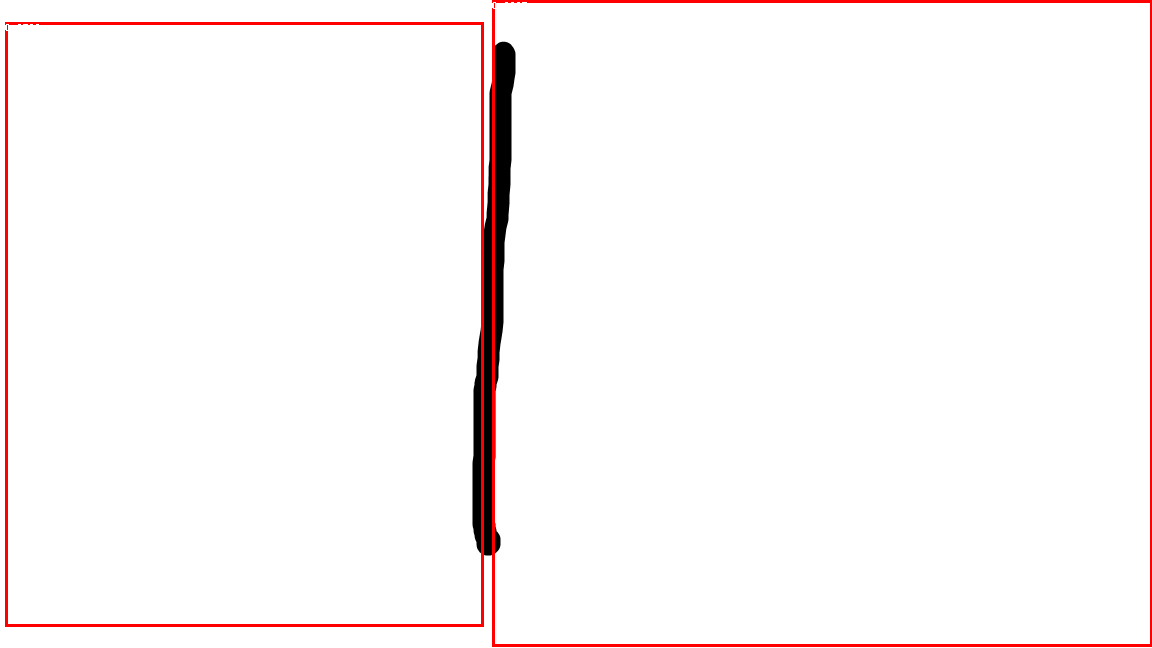

In [132]:
idx = -1
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [133]:
prediction

[{'boxes': tensor([[   5.4103,   22.1452,  483.8880,  626.3666],
          [ 492.1039,    0.0000, 1152.0000,  646.6754],
          [ 441.2695,  308.0474, 1150.9399,  639.6223]]),
  'labels': tensor([4, 4, 4]),
  'scores': tensor([0.8766, 0.8637, 0.1145])}]

In [134]:
idx = -2
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [135]:
prediction

[{'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])}]

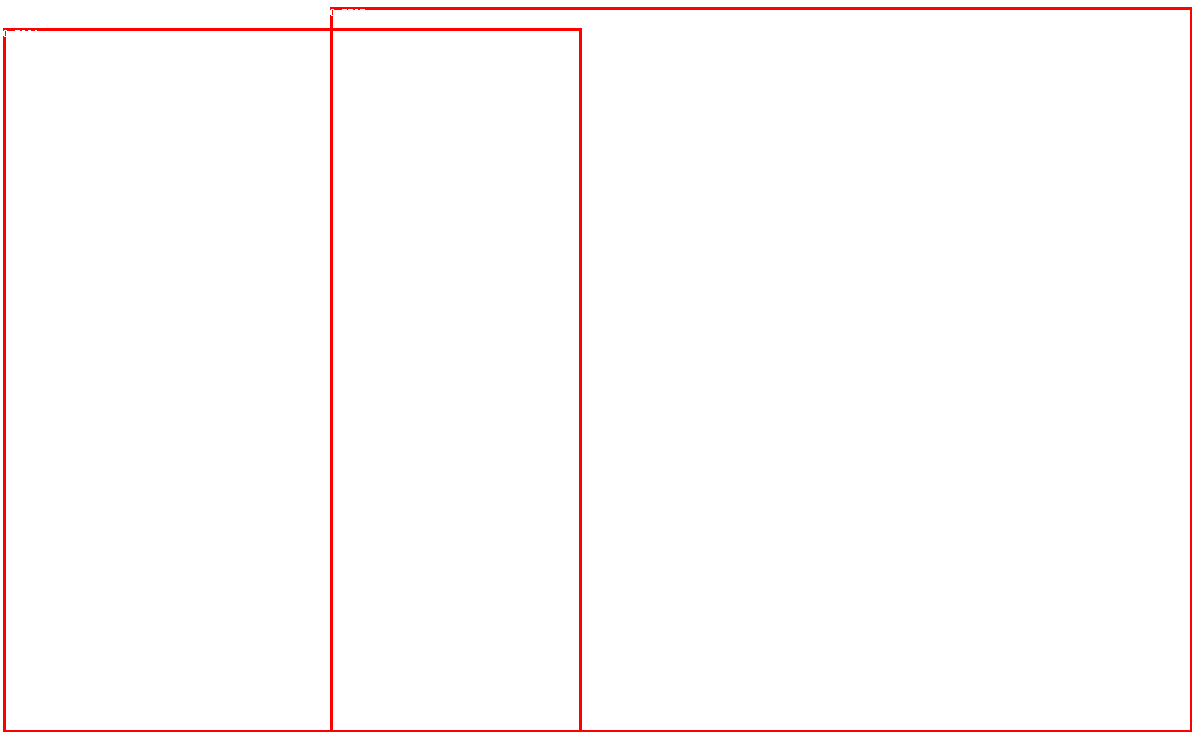

In [136]:
idx = -3
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [137]:
prediction

[{'boxes': tensor([[   3.4823,   28.1602,  581.7913,  732.0000],
          [ 330.6146,    7.0508, 1192.0000,  732.0000],
          [ 615.9924,  249.7965, 1177.0355,  732.0000],
          [ 162.4323,   39.1900,  872.3177,  650.1637],
          [  24.8677,  356.8196,  886.9629,  732.0000],
          [  18.6796,   18.5023,  685.8564,  410.6422],
          [ 417.4826,   21.5204, 1177.3287,  404.4865]]),
  'labels': tensor([4, 4, 4, 4, 4, 4, 4]),
  'scores': tensor([0.5921, 0.5787, 0.1974, 0.1632, 0.1423, 0.1416, 0.1346])}]

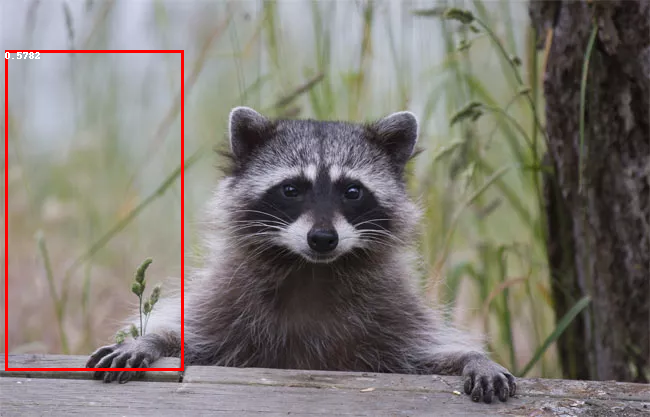

In [138]:
idx = -4
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [139]:
prediction

[{'boxes': tensor([[  5.9122,  50.2445, 183.3647, 370.2570],
          [124.3350, 146.1736, 205.3596, 222.9582],
          [ 22.0244, 217.2813,  83.7166, 298.6290],
          [ 32.0708, 220.0836,  96.7988, 355.3046],
          [ 22.9119, 126.0413, 144.7294, 344.6018],
          [403.8510,  61.0046, 563.7667, 349.7661],
          [111.5046, 245.6443, 172.0626, 297.2397],
          [112.9393, 114.7100, 210.3744, 259.0114],
          [ 19.5688, 111.8391, 198.8524, 272.3445]]),
  'labels': tensor([4, 3, 3, 3, 4, 4, 3, 3, 4]),
  'scores': tensor([0.5782, 0.1668, 0.1197, 0.1098, 0.1045, 0.0823, 0.0743, 0.0588, 0.0554])}]

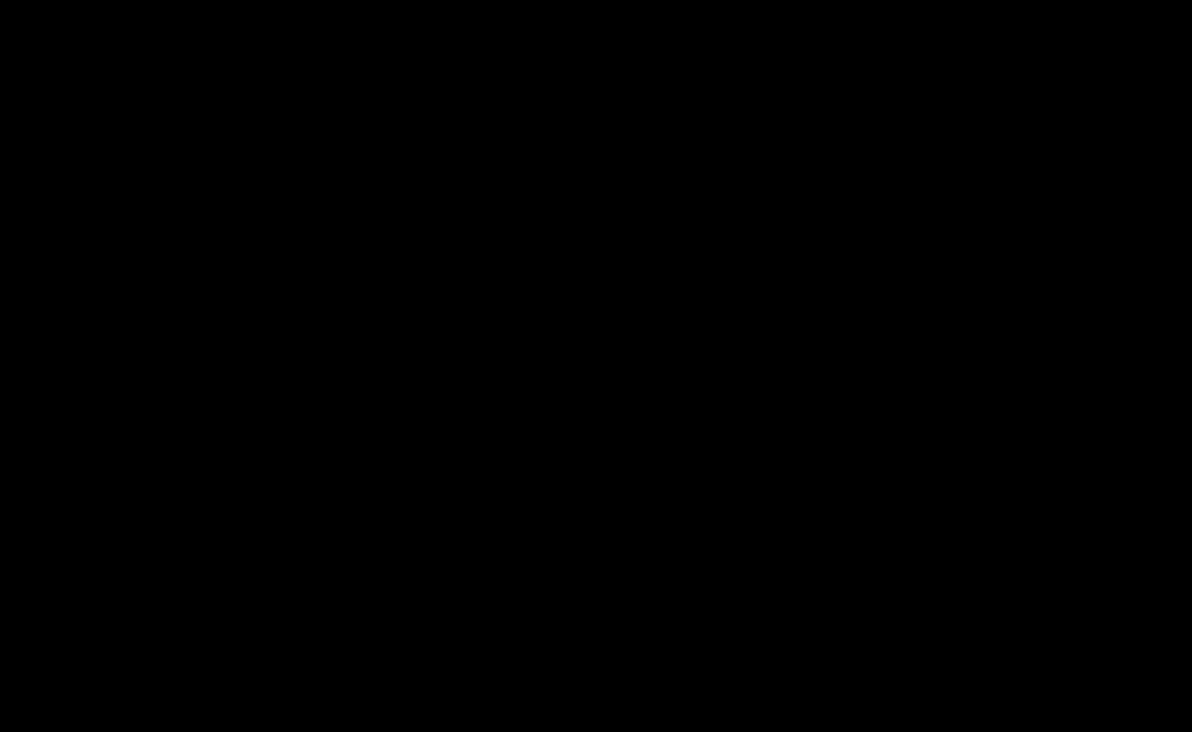

In [140]:
idx = -5
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [141]:
prediction

[{'boxes': tensor([[ 550.9219,  163.8055, 1120.9497,  702.7976]]),
  'labels': tensor([1]),
  'scores': tensor([0.0536])}]

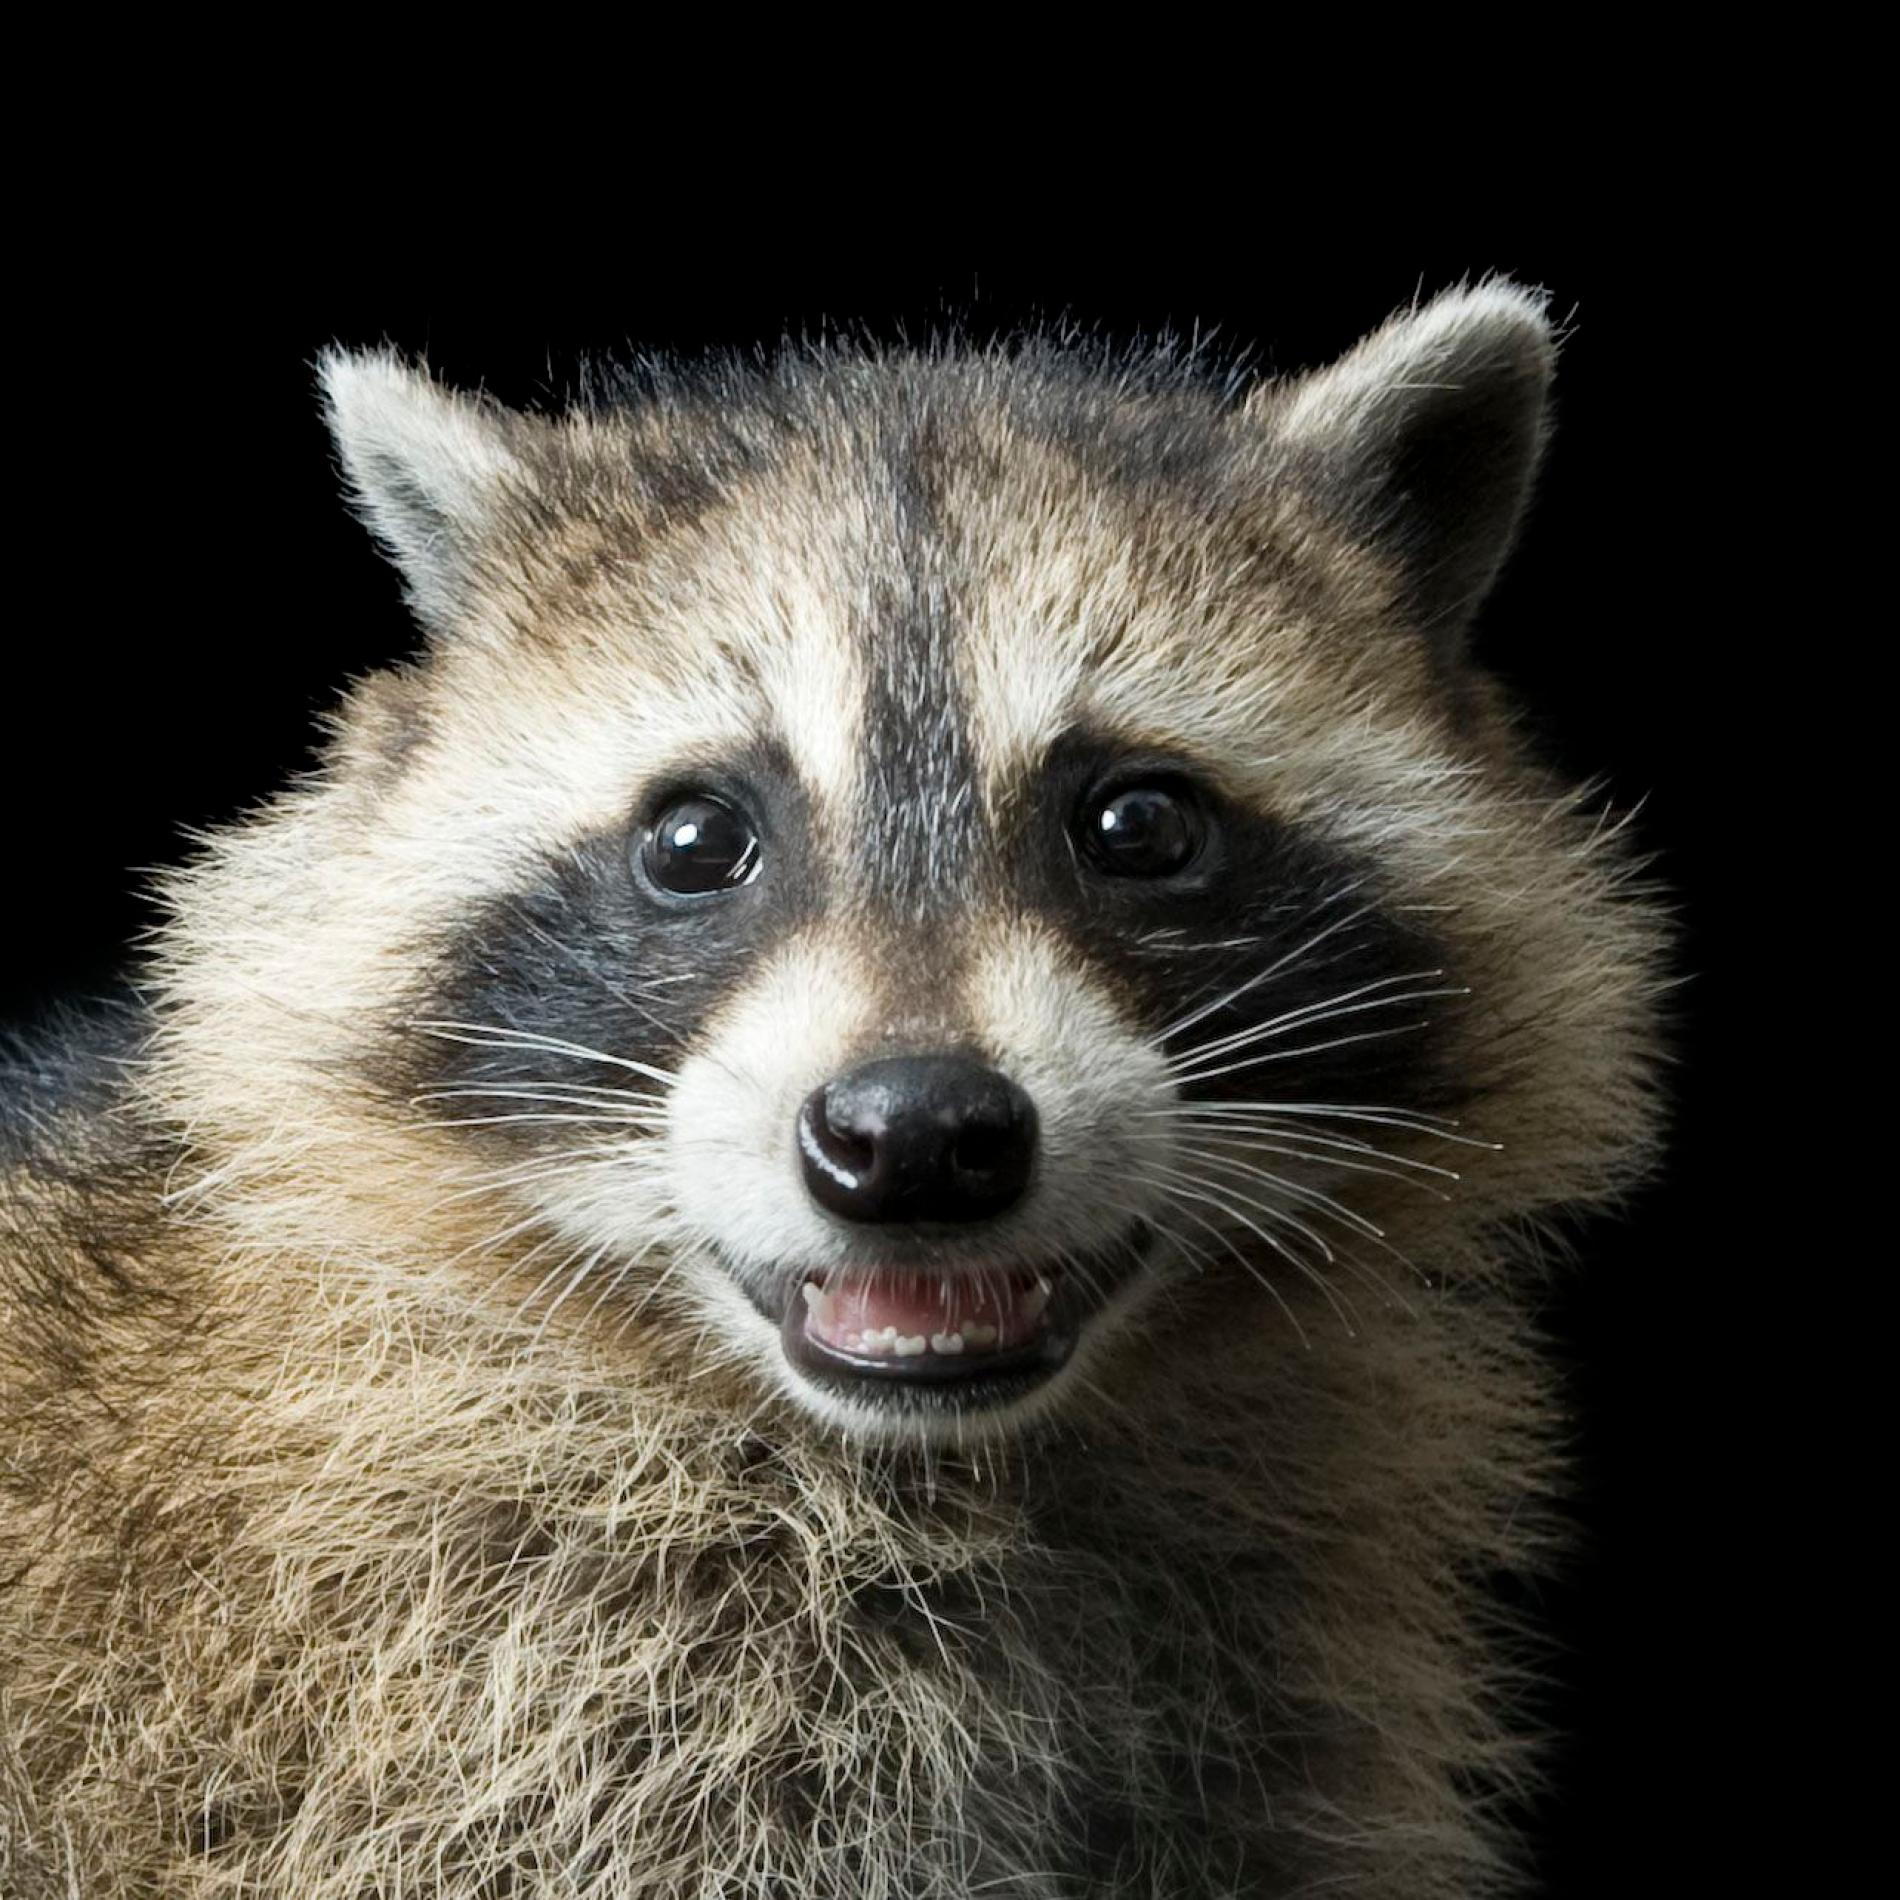

In [142]:
idx = -6
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [143]:
prediction

[{'boxes': tensor([[1.5459e+01, 1.3929e+03, 8.2882e+02, 1.9000e+03],
          [0.0000e+00, 1.4205e+03, 4.3507e+02, 1.8725e+03],
          [3.8847e+02, 3.2854e+02, 8.1667e+02, 6.7446e+02],
          [0.0000e+00, 8.7561e+02, 2.5539e+02, 1.4146e+03],
          [0.0000e+00, 1.4228e+03, 4.9017e+02, 1.8941e+03],
          [0.0000e+00, 8.8073e+02, 2.9678e+02, 1.4339e+03],
          [0.0000e+00, 1.0429e+03, 3.3079e+02, 1.8886e+03],
          [4.2350e+02, 3.1896e+02, 8.2329e+02, 6.4245e+02],
          [3.8636e+02, 3.4291e+02, 8.1202e+02, 6.8640e+02],
          [0.0000e+00, 1.0080e+03, 1.5885e+03, 1.9000e+03],
          [8.9438e+02, 3.2195e+02, 1.5517e+03, 8.4569e+02],
          [9.1026e+00, 1.0703e+03, 1.4488e+03, 1.9000e+03],
          [1.1741e+02, 1.3899e+03, 8.5957e+02, 1.8821e+03],
          [3.1514e+00, 8.8871e+02, 7.1048e+02, 1.9000e+03],
          [3.2663e+02, 8.4188e+02, 7.0409e+02, 1.1953e+03],
          [0.0000e+00, 9.2044e+02, 6.4825e+02, 1.9000e+03],
          [3.0753e-01, 1.3700e+

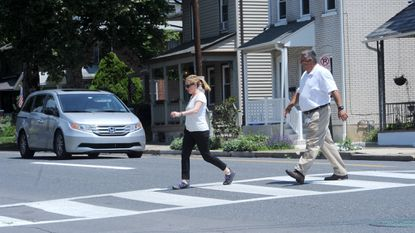

In [144]:
idx = -7
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [145]:
prediction

[{'boxes': tensor([], size=(0, 4)),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([])}]

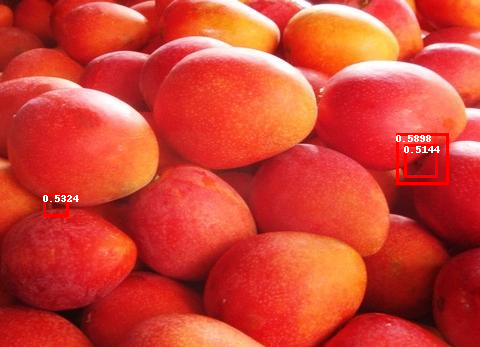

In [146]:
idx = -8
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [147]:
prediction

[{'boxes': tensor([[396.3794, 133.4977, 448.1394, 184.0743],
          [ 43.2360, 193.7259,  68.5527, 216.5275],
          [404.7064, 144.3327, 437.3217, 177.8783],
          [290.3062, 240.0504, 364.9201, 317.2238],
          [ 45.7599, 198.2551,  64.0858, 211.8854],
          [ 34.0522, 181.6695,  77.2699, 225.7221],
          [243.7306,  75.0738, 323.4248, 149.9886],
          [131.3986,  91.9339, 159.4569, 120.3306],
          [108.1647, 122.0231, 167.7056, 194.2830],
          [246.4186, 215.9671, 270.0068, 242.9287],
          [407.3771, 155.1506, 428.5588, 174.3398],
          [366.9464, 128.1571, 456.3254, 219.0388],
          [264.2615, 216.8353, 361.1701, 340.1982],
          [207.1224, 152.8112, 285.2191, 181.3280]]),
  'labels': tensor([3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3]),
  'scores': tensor([0.5898, 0.5324, 0.5144, 0.3865, 0.2610, 0.2556, 0.2077, 0.2006, 0.1405,
          0.1328, 0.0947, 0.0944, 0.0844, 0.0612])}]

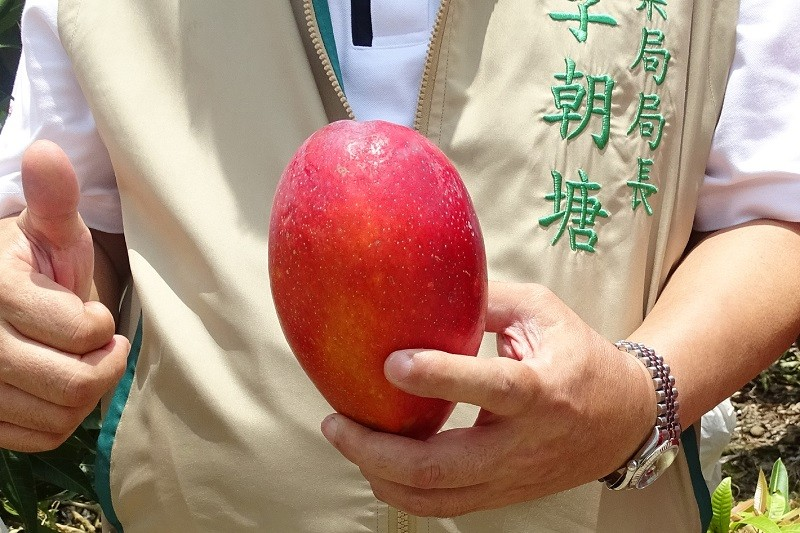

In [148]:
idx = -9
img, _ = valid_set[idx]
label_boxes = np.array(valid_set[idx][1]["boxes"])
#put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
   prediction = loaded_model([img])
image = Image.fromarray(img.mul(255).permute(1, 2,0).byte().numpy())
draw = ImageDraw.Draw(image)
# draw groundtruth
for elem in range(len(label_boxes)):
   draw.rectangle([(label_boxes[elem][0], label_boxes[elem][1]),
   (label_boxes[elem][2], label_boxes[elem][3])], 
   outline ="green", width =3)
for element in range(len(prediction[0]["boxes"])):
   boxes = prediction[0]["boxes"][element].cpu().numpy()
   score = np.round(prediction[0]["scores"][element].cpu().numpy(),
                    decimals= 4)
   if score > 0.5:
      draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], 
      outline ="red", width =3)
      draw.text((boxes[0], boxes[1]), text = str(score))
image

In [149]:
prediction

[{'boxes': tensor([[617.6800, 334.8733, 688.5690, 428.0403],
          [328.3422, 127.1096, 404.0864, 187.2954],
          [282.5237, 212.3619, 404.8930, 417.5389],
          [588.1591, 441.7531, 675.5851, 497.8574],
          [331.2813, 160.5923, 353.9595, 184.2464],
          [345.3765, 130.1021, 396.5012, 173.5413],
          [287.7172, 203.0095, 476.0193, 369.2077],
          [585.4966, 330.1696, 692.1808, 494.4429],
          [590.5759, 456.9452, 638.3430, 496.0418],
          [412.7145, 218.7395, 486.5850, 354.3629],
          [328.8453, 128.8226, 399.2391, 187.5741]]),
  'labels': tensor([3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3]),
  'scores': tensor([0.2335, 0.1745, 0.1136, 0.1074, 0.0829, 0.0633, 0.0616, 0.0607, 0.0559,
          0.0550, 0.0539])}]

## Test on Dev

In [64]:
root= r"D:\user\Documents\N26091194_TENG\Projects\mango\C2_TrainDev"

In [65]:
imgs = sorted(os.listdir(os.path.join(root, "Dev")))

In [66]:
loaded_model.eval()
files=[]
#label_map = {'不良-乳汁吸附':1, '不良-機械傷害':2, '不良-炭疽病':3, '不良-著色不佳':4, '不良-黑斑病':5}
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]

for i in tqdm(range(len(imgs)), position=0, leave=True):
    idx = i
    img, _ = valid_set[idx]
    label_boxes = np.array(valid_set[idx][1]["boxes"])
                                                  
    aa=bb=cc=dd=ee=0

    with torch.no_grad():
        prediction = loaded_model([img])    
                           
    for element in range(len(prediction[0]["boxes"])):
        score = np.round(prediction[0]["scores"][element].numpy(), decimals= 4)
        
        if score > 0.5:
            if prediction[0]["labels"][element].numpy() == 1:
                aa=1
            elif prediction[0]["labels"][element].numpy() == 2:
                bb=1
            elif prediction[0]["labels"][element].numpy() == 3:
                cc=1
            elif prediction[0]["labels"][element].numpy() == 4:               
                dd=1
            elif prediction[0]["labels"][element].numpy() == 5:
                ee=1
        else:
            break
                           
    if aa == 1:
        class1.append(True)
    else:
        class1.append(False)

    if bb == 1:
        class2.append(True)
    else:
        class2.append(False)

    if cc == 1:
        class3.append(True)
    else:
        class3.append(False)

    if dd == 1:
        class4.append(True)
    else:
        class4.append(False)

    if ee == 1:
        class5.append(True)
    else:
        class5.append(False)
    
    files.append(imgs[i])
                           

pred_df = pd.DataFrame({'image_id':files,'d0':class1,'d1':class2, 'd2':class3,  'd3':class4, 'd4':class5 })

  0%|                                                                               | 2/3683 [00:07<3:49:57,  3.75s/it]


KeyboardInterrupt: 

In [ ]:
pred_df.to_pickle(r"E:\user\Documents\Projects\AICUP_2020_Mango\C2_TrainDev\N26091194_predict.pkl")
pred_df.to_csv(r"E:\user\Documents\Projects\AICUP_2020_Mango\C2_TrainDev\N26091194_predict.tsv", sep = '\t')